# Estimation of obesity levels based on eating habits and physical condition

## Data Set Information

**Abstract:** This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.  
  
- This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. - The data contains 17 attributes and 2111 records
- The records are labeled: NObesity (Obesity Level)
    - Values: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.
  
- 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

### Attribute Information

[Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub)

### Source

- Fabio Mendoza Palechor, Email: fmendoza1@cuc.edu.co, Celphone: +573182929611
- Alexis de la Hoz Manotas, Email: akdelahoz@gmail.com, Celphone: +573017756983

### Citations

- Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.
- Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Ionosphere). Irvine, CA: University of California, School of Information and Computer Science.

## Main Objectives

- Identify possible internal structures (clusters) on the dataset that are not described explicitly by the variables recorded.

This segmentation could allow the reasearches find additional categorical features that explain obesity in the population surveyed. 

## Load data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', sep = ',')

## Data Cleaning

In [3]:
data.shape

(2111, 17)

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Redundant columns

In [5]:
non_redundant = [i for i in data.columns if len(data[i].unique()) != 1]
df = data.loc[:, non_redundant]

### Duplicates

In [6]:
df.index.is_unique

True

In [7]:
df.duplicated().sum()

24

In [8]:
(df.duplicated().sum()/df.shape[0])*100

1.1369019422074846

The **24** duplicated rows represents only the 1.14% of the data. However, in this dataset is possible to have duplicated values. None will be removed.

### Missing Values

In [9]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There is **0** missing values.

### Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Exploratory Data Analysis

### Correlation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

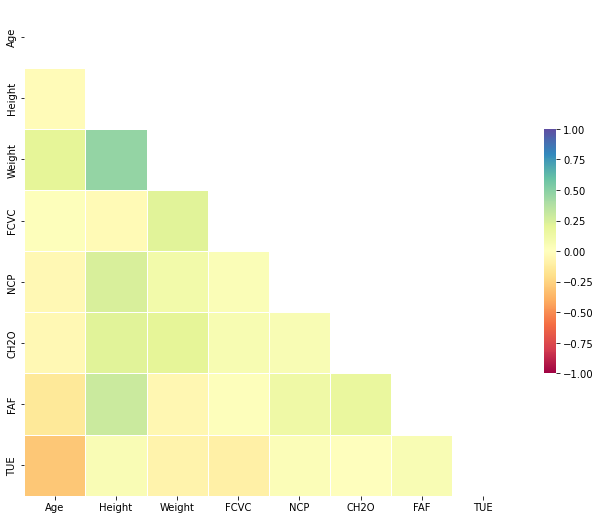

In [12]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
floats = df.select_dtypes(include=['float64']).columns.tolist()

#### Correlation Table

**round2:** "round up" custom function

In [14]:
def round2(x):
    from math import ceil
    if x >= 0:
        return ceil(x*10)/10
    else:
        return round(x, 1)

**corr_label:** labels the correlation coefficients.

In [15]:
def corr_label(x):
    cl = {1:'Perfect +', 0.9:'Very strong +', 0.8:'Strong +', 0.7:'Strong +', 0.6:'Moderate +', 0.5:'Moderate +', 0.4:'Weak +', 0.3:'Weak +', 0.2:'Very weak +', 0.1:'Very weak +', 0:'No corr',
          -1:'Perfect -', -0.9:'Very strong -', -0.8:'Strong -', -0.7:'Strong -', -0.6:'Moderate -', -0.5:'Moderate -', -0.4:'Weak -', -0.3:'Weak -', -0.2:'Very weak -', -0.1:'Very weak -',}
    
    if x in cl.keys():
        return cl[x]
    else:
        return ''

**background_colors:** applies different styler functions to the correlation dataframe. Uses corr_label to assign colors to the final table.

In [16]:
def background_colors(styler):
    styler.set_caption('Correlation Coefficients Interpretation')
    styler.format(corr_label)
    styler.background_gradient(axis=None, vmin=-1, vmax=1, cmap='Spectral')
    styler.applymap(lambda x: 'background-color : white' if np.isnan(x) else '')
    return styler

In [17]:
corr = corr.applymap(round2)
corr_diag = corr.where(mask)
corr_diag.style.pipe(background_colors)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,Perfect +,No corr,Weak +,Very weak +,No corr,No corr,Very weak -,Weak -
Height,,Perfect +,Moderate +,No corr,Weak +,Weak +,Weak +,Very weak +
Weight,,,Perfect +,Weak +,Very weak +,Weak +,Very weak -,Very weak -
FCVC,,,,Perfect +,Very weak +,Very weak +,Very weak +,Very weak -
NCP,,,,,Perfect +,Very weak +,Very weak +,Very weak +
CH2O,,,,,,Perfect +,Very weak +,Very weak +
FAF,,,,,,,Perfect +,Very weak +
TUE,,,,,,,,Perfect +


### Skewness per feature

In [18]:
floats = df.select_dtypes(include=['float64']).columns.tolist()
skewness = {i:df[i].skew() for i in floats}
skewness

{'Age': 1.529100353758853,
 'Height': -0.012854646457936172,
 'Weight': 0.2554104953556746,
 'FCVC': -0.4329058314318413,
 'NCP': -1.1070972671361423,
 'CH2O': -0.10491164486824152,
 'FAF': 0.49848961466299796,
 'TUE': 0.6185024143058271}

### Feature Distribution Visualization

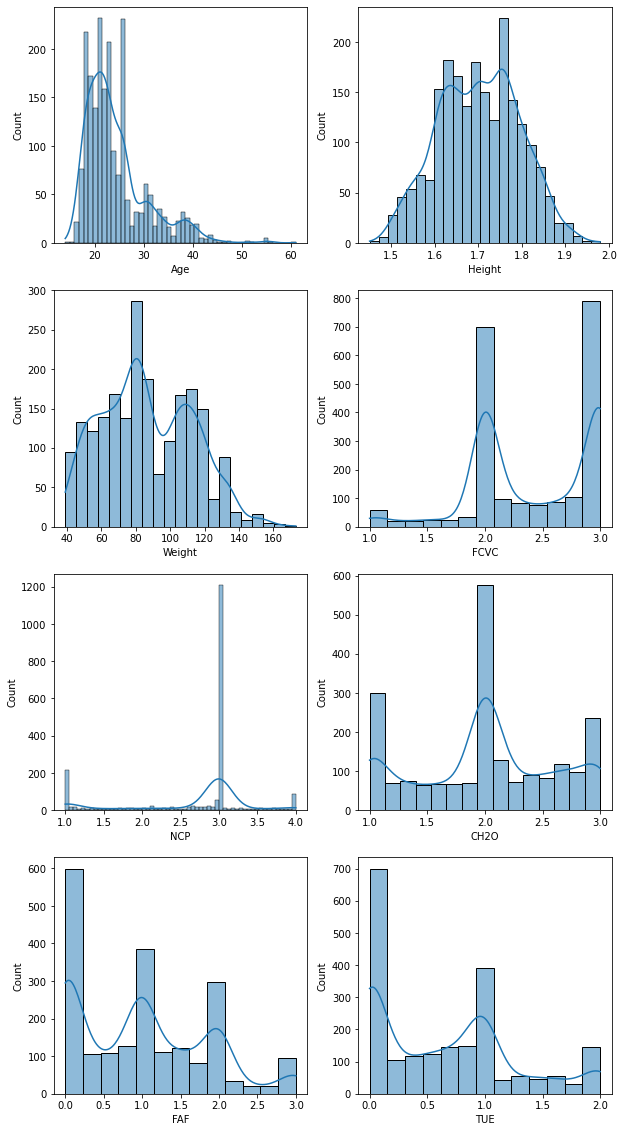

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for i, j in zip(floats, axes.flatten()):
    sns.histplot(x = df[i], ax=j, kde=True)

There seems to multimodality in some feature's distributions, which is expected given the amount of categorical variables in the dataset.

### Outliers

#### Identifying outliers with z-score

In [20]:
from scipy import stats

In [21]:
# Identify values > 2.698, which means they are outside of a normal distribution's 99.66% interval.
max_value = 2.698
outliers = []

for i in floats:
    z_score = stats.zscore(df[i])
    mask = abs(z_score) > max_value 
    if sum(mask) != 0:
        outliers.append({'Feature':i, 'Mask':mask})

##### Number of outliers per feature

In [22]:
for i in outliers:
    print(i['Feature'], ':', sum(i['Mask']))

Age : 32
Height : 3
Weight : 4


#### Visualizing Outliers in relationship with **NObeyesdad**

In [23]:
plot_data = df.copy()

In [24]:
for i in outliers:
    x = i['Mask'].apply(lambda x: 'Outlier' if x else 'Normal')
    plot_data[i['Feature'] + '_outlier'] = x

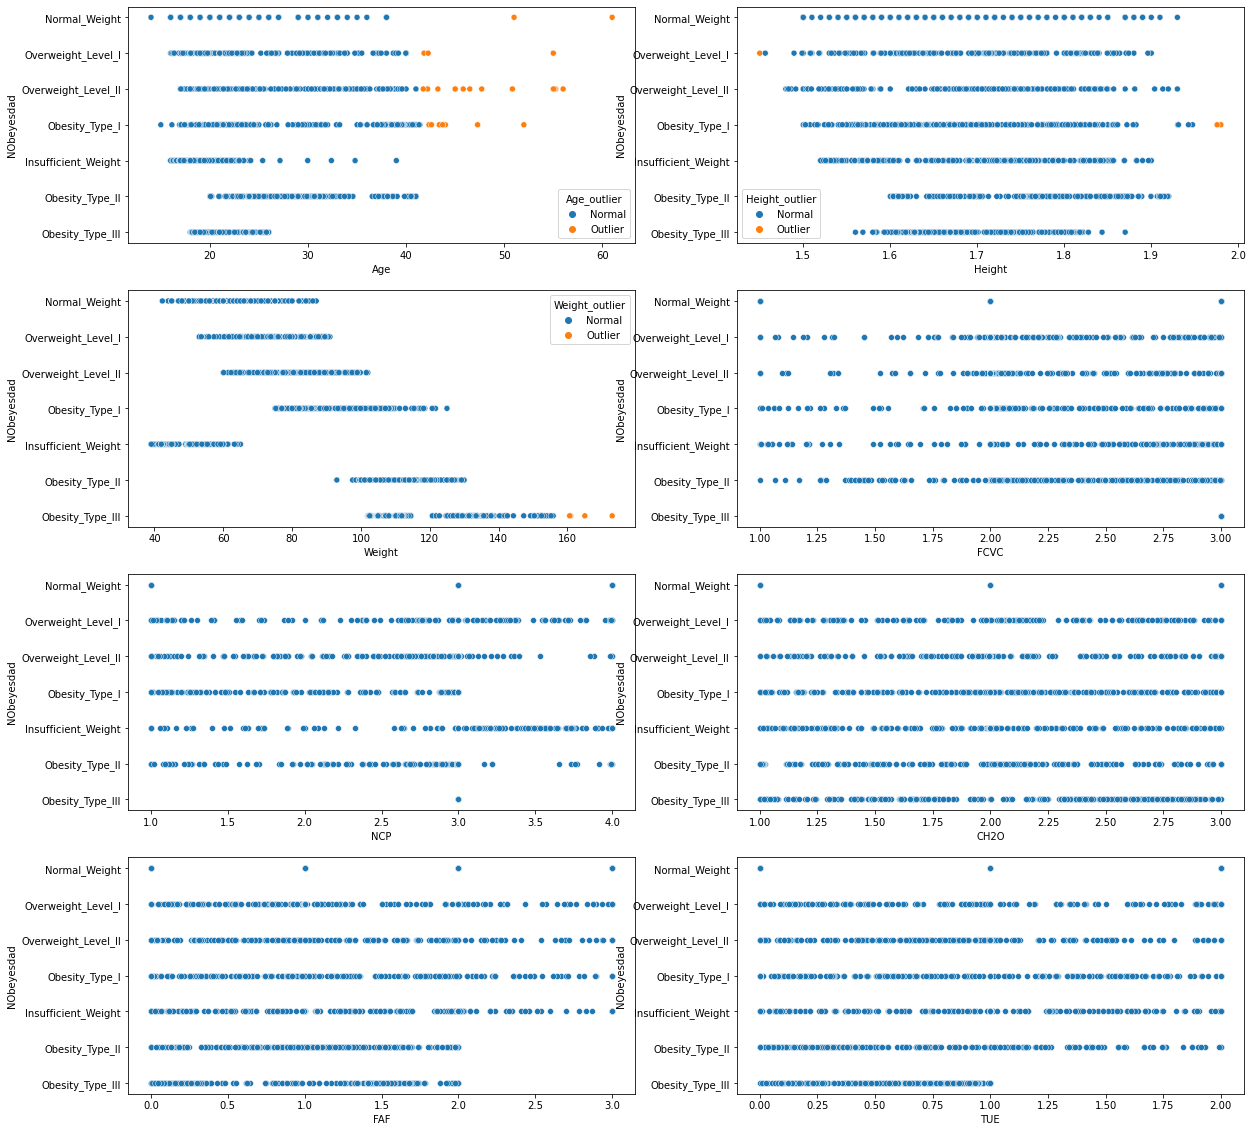

In [25]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

for i, j in zip(floats, axes.flatten()):
    if i + '_outlier' in plot_data.columns:
        sns.scatterplot(data=plot_data, x=i, y='NObeyesdad', ax=j, hue=i + '_outlier')
    else:
        sns.scatterplot(data=plot_data, x=i, y='NObeyesdad', ax=j)

The outliers do not seem to come from abnormalities in the data gathering process. They will not be deleted or modified.

#### Visualizing **NObeyesdad** distribution

<AxesSubplot:xlabel='NObeyesdad', ylabel='Count'>

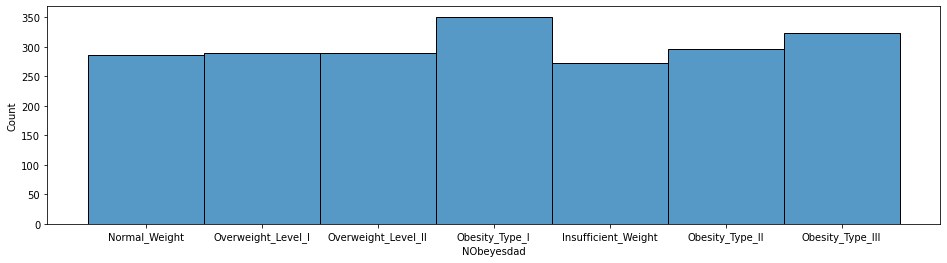

In [26]:
plt.figure(figsize=(16,4))
sns.histplot(x = df['NObeyesdad'])

In [27]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

The dataset is balanced.

## Feature Engineering

In [28]:
categories = df.select_dtypes(include=['object']).columns.tolist()

### Standard Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

frames = []
frames.append(pd.DataFrame(data=scaler.fit_transform(df[floats]), columns=floats))

### One-Hot Encoding

In [31]:
nominal = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

In [32]:
for i in nominal:
    x = pd.get_dummies(df[i], prefix=i)
    frames.append(x)

### Label Encoding

In [33]:
ordinal = [i for i in categories if i not in nominal]

In [34]:
CAEC_CALC_dict = {'no':0, 'Sometimes':1 , 'Frequently':2, 'Always':3}
NObeyesdad_dict = {'Insufficient_Weight':-1, 'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2, 'Obesity_Type_I':3, 'Obesity_Type_II':4, 'Obesity_Type_III':5}

In [35]:
CAEC = pd.DataFrame(data=df['CAEC'].replace(CAEC_CALC_dict), columns=['CAEC'])
CALC = pd.DataFrame(data=df['CALC'].replace(CAEC_CALC_dict), columns=['CALC'])
NObeyesdad = pd.DataFrame(data=df['NObeyesdad'].replace(NObeyesdad_dict), columns=['NObeyesdad'])

In [36]:
frames.extend([CAEC, CALC, NObeyesdad])

### Final Table

In [37]:
df2 = pd.concat(frames, axis=1)
df2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,CALC,NObeyesdad
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1,0,...,1,0,0,0,0,1,0,1,0,0
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1,0,...,0,1,0,0,0,1,0,1,1,0
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,0,1,...,1,0,0,0,0,1,0,1,2,0
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,0,1,...,1,0,0,0,0,0,1,1,2,1
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0,1,...,1,0,0,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,1,0,...,1,0,0,0,0,1,0,1,1,5
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,1,0,...,1,0,0,0,0,1,0,1,1,5
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,1,0,...,1,0,0,0,0,1,0,1,1,5
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,1,0,...,1,0,0,0,0,1,0,1,1,5


## Clustering

### K-means

In [38]:
from sklearn.cluster import KMeans

In [39]:
KM_list = list()

for i in range(1,31):
    KM = KMeans(n_clusters = i, random_state=69)
    KM = KM.fit(df2)
    
    KM_list.append(pd.Series({'clusters': str(i), 'inertia': KM.inertia_, 'model': KM}))

<AxesSubplot:xlabel='clusters'>

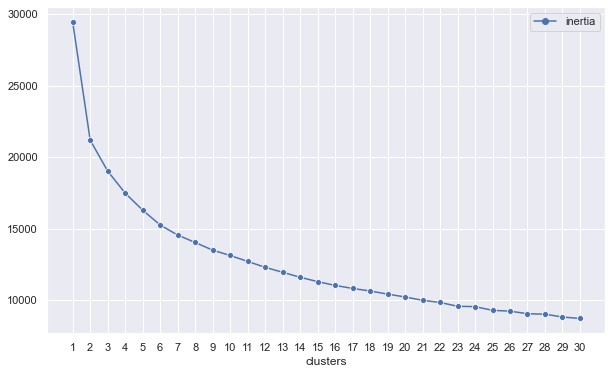

In [40]:
plot_data = pd.concat(KM_list, axis=1).T[['clusters','inertia']].set_index('clusters')
plt.figure(figsize=(10,6))
sns.set_theme()
sns.lineplot(data=plot_data, markers = True)

In [41]:
min_d = np.inf
values =[]

for i in range(1, 30):
    x = plot_data.loc[str(i), 'inertia'] - plot_data.loc[str(i+1), 'inertia']
    if x < min_d:
        min_d = x
        values.append(i)

In [42]:
pd.DataFrame(values, columns = ['Possible Values'])

,Possible Values
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,9
8,12
9,14


- Number of clusters chosen: 23

In [43]:
KM_final = KMeans(n_clusters = 23, random_state=69).fit(df2)

### Mean Shift

In [44]:
from sklearn.cluster import MeanShift

In [45]:
MS_final = MeanShift().fit(df2)

### DBSCAN

#### Finding $\epsilon$

In [46]:
from sklearn.neighbors import NearestNeighbors

In [47]:
NN = NearestNeighbors(n_neighbors=2)
NN_model = NN.fit(df2)
distances, indices = NN_model.kneighbors(df2)
distances = np.sort(distances, axis=0)[:,1]

In [48]:
from matplotlib.ticker import FormatStrFormatter

In [49]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

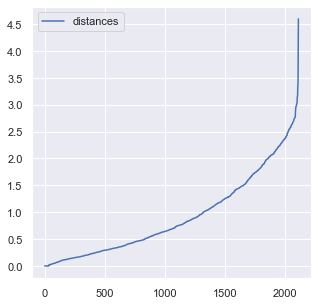

In [50]:
plot_data = pd.DataFrame(distances, columns=['distances'])
ticks = [i for i in np.arange(0, 4.6, 0.5)]

plt.figure(figsize=(5,5))
fig = sns.lineplot(data=plot_data)
fig.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

with HiddenPrints():
    fig.set_yticks(ticks)

In [51]:
max_d = -np.inf
values =[]

for i in range(0, len(plot_data)-1):
    x = plot_data.loc[i+1, 'distances'] - plot_data.loc[i, 'distances']
    if x > max_d:
        max_d = x
        values.append(plot_data.loc[i, 'distances'])

In [52]:
pd.DataFrame(values, columns = ['Possible Values'])

,Possible Values
0,0.000000
1,0.000000
2,2.397712
3,2.433068
4,2.780470
5,3.038954
6,3.159086
7,3.396346
8,3.788325


Chosen epsilon: 2.4

#### DBSCAN

In [53]:
from sklearn.cluster import DBSCAN

In [54]:
DB_final = DBSCAN(eps=2.4, min_samples=5).fit(df2)

### Labels

In [55]:
df2.insert(0, 'KM', KM_final.labels_)
df2.insert(1, 'MS', MS_final.labels_)
df2.insert(2, 'DB', DB_final.labels_)

### Visualization

#### K-means

<AxesSubplot:xlabel='Age', ylabel='Height'>

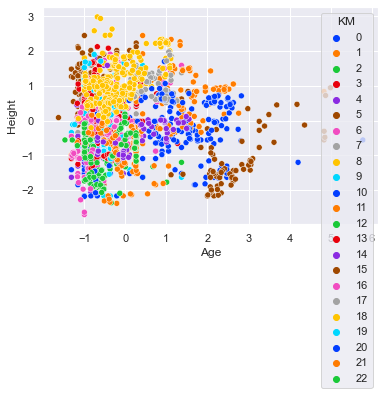

In [56]:
sns.scatterplot(data = df2, x='Age', y='Height', hue= 'KM', palette='bright')

#### Mean Shift

<AxesSubplot:xlabel='Age', ylabel='Height'>

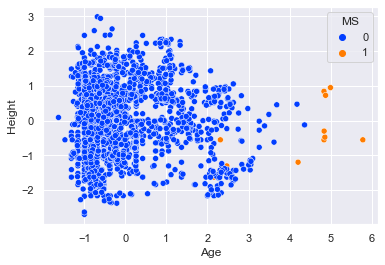

In [57]:
sns.scatterplot(data = df2, x='Age', y='Height', hue= 'MS', palette='bright')

#### DBSCAN

<AxesSubplot:xlabel='Age', ylabel='Height'>

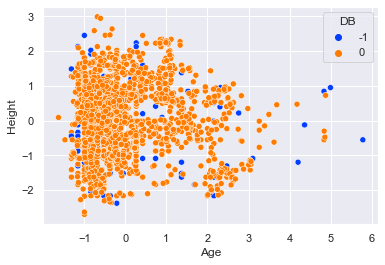

In [58]:
sns.scatterplot(data = df2, x='Age', y='Height', hue= 'DB', palette='bright')

In [59]:
outliers_dfs = []

for i in outliers:
    x = pd.DataFrame(i).pivot(columns='Feature', values='Mask').rename_axis(None, axis=1)
    outliers_dfs.append(x)

In [60]:
outliers_df = pd.concat(outliers_dfs, axis=1)

In [61]:
outlier_col = []

for i in outliers_df.index:
    x = sum(outliers_df.loc[i])
    if x > 0:
        outlier_col.append('Outlier')
    else:
        outlier_col.append('Normal')

In [62]:
df2.insert(0, 'Outliers', outlier_col)

## Key Findings

- K-means segments the dataset into 23 different clusters. It could represent a hidden structure that allows a better classification of the **NObeyesdad** target feature.
- Both Mean Shift and DBSCAN find similar main clusters, containing most of the data, and similar secondary clusters, containing a very small section of the data set.
    - DBSCAN classifies the secondary cluster as outliers.

### Mean Shift - DBSCAN secondary cluster comparison

In [63]:
oms_odb = df2[(df2['MS'] == 1) & (df2['DB'] == -1)].shape[0]
oms_nbd = df2[(df2['MS'] == 1) & (df2['DB'] == 0)].shape[0]
nms_odb = df2[(df2['MS'] == 0) & (df2['DB'] == -1)].shape[0]
nms_ndb = df2[(df2['MS'] == 0) & (df2['DB'] == 0)].shape[0]

In [64]:
cm_msdb = np.array([[oms_nbd, oms_odb], [nms_ndb, nms_odb]])

Text(39.5, 0.5, 'Mean Shift')

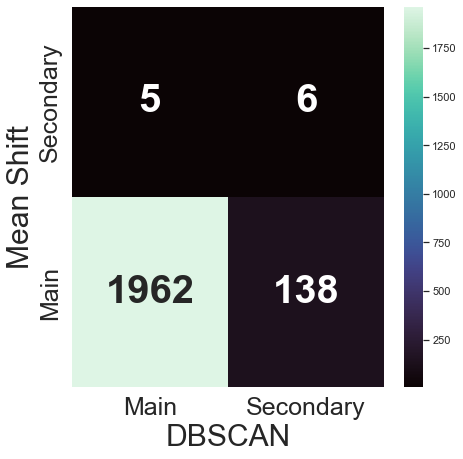

In [65]:
_, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm_msdb, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='mako')  
labels_x = ['Main', 'Secondary']
labels_y = ['Secondary', 'Main']

ax.set_xticklabels(labels_x, fontsize=25);
ax.set_yticklabels(labels_y, fontsize=25);
ax.set_xlabel('DBSCAN', fontsize=30);
ax.set_ylabel('Mean Shift', fontsize=30)

### Mean Shift - z-score outlier comparison

In [66]:
oms_oz = df2[(df2['MS'] == 1) & (df2['Outliers'] == 'Outlier')].shape[0]
oms_nz = df2[(df2['MS'] == 1) & (df2['Outliers'] == 'Normal')].shape[0]
nms_oz = df2[(df2['MS'] == 0) & (df2['Outliers'] == 'Outlier')].shape[0]
nms_nz = df2[(df2['MS'] == 0) & (df2['Outliers'] == 'Normal')].shape[0]

In [67]:
cm_msz = np.array([[oms_nz, oms_oz], [nms_nz, nms_oz]])

Text(39.5, 0.5, 'Mean Shift')

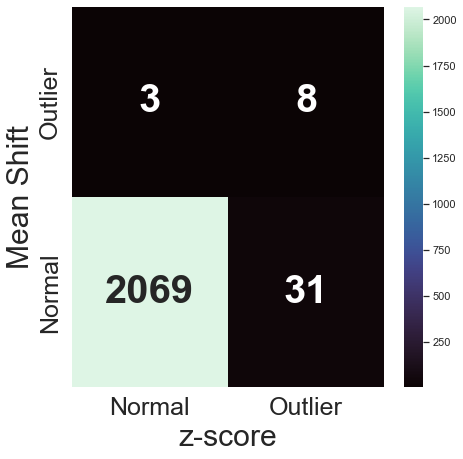

In [68]:
_, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm_msz, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='mako')  
labels_x = ['Normal', 'Outlier']
labels_y = ['Outlier', 'Normal']

ax.set_xticklabels(labels_x, fontsize=25);
ax.set_yticklabels(labels_y, fontsize=25);
ax.set_xlabel('z-score', fontsize=30);
ax.set_ylabel('Mean Shift', fontsize=30)

### DBSCAN - z-score outlier comparison

In [69]:
oz_odb = df2[(df2['Outliers'] == 'Outlier') & (df2['DB'] == -1)].shape[0]
oz_nbd = df2[(df2['Outliers'] == 'Outlier') & (df2['DB'] == 0)].shape[0]
nz_odb = df2[(df2['Outliers'] == 'Normal') & (df2['DB'] == -1)].shape[0]
nz_ndb = df2[(df2['Outliers'] == 'Normal') & (df2['DB'] == 0)].shape[0]

In [70]:
cm_zdb = np.array([[oz_nbd, oz_odb], [nz_ndb, nz_odb]])

Text(39.5, 0.5, 'z-score')

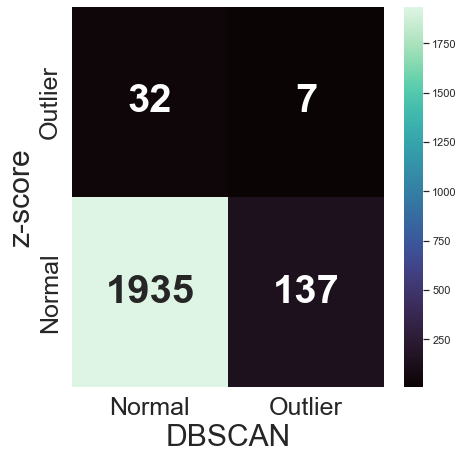

In [71]:
_, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm_zdb, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='mako')  
labels_x = ['Normal', 'Outlier']
labels_y = ['Outlier', 'Normal']

ax.set_xticklabels(labels_x, fontsize=25);
ax.set_yticklabels(labels_y, fontsize=25);
ax.set_xlabel('DBSCAN', fontsize=30);
ax.set_ylabel('z-score', fontsize=30)

- Mean Shift performs better than DBSCAN finding the outliers determined by a z-score analysis.
- Nevertheless, the results of both Mean Shift and DBSCAN are conceptually very similar. Perhaps this "extreme" cluster can help classify one category of the **NObeyesdad** target feature.

## Possible Flaws & Future Work

- A hierarchical clustering algorithm can be used to complement the clustering analysis.
- The multimodality of some features can be further analyzed with the results of the clustering algorithm.
- Classification algorthms can be applied to: 
    - Evaluate the effectiveness of the clustering algorithms in finding an internal structure in the dataset.
    - Classify the target feature to eventually identify the obesity level of people using the variables provided in the dataset. 

## Author

Nicolas Hernandez

In [73]:
!jupyter nbconvert --to webpdf --no-input --allow-chromium-download ClusteringProject-NicolasHernandez.ipynb

[NbConvertApp] Converting notebook ClusteringProject-NicolasHernandez.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 654401 bytes to ClusteringProject-NicolasHernandez.pdf
